## Preamble

Dissatisfaction leads to employee turnover, lower productivity, stress and conflict in workplace. Therefore, it is important to develop and ensure the job satisfction of employees to benefit both the individuals and the organizaiton

Here since the output is not known unsupervisied algorithm Association rule mining is used.

Association rules can be consdiered an IF-THEN relationship. Antecedent (IF) and consequent (THEN)

Consequent comes along as a factor with an antecedent/ group of antecedents. (For example, job satisfaction is the consequent considering the number of projects, evaluation score, etc. as the antecedents). Thus, a number of factors can be considered having an association with the consequent (job satisfaction).

There are three important components of the apriori algorithm: support, confidence, and lift.

• Support tells us about the frequent combination of factors. This will thus help to determine the combination of factors with a low and high frequency.

• Confidence tells us how often the factors A and B occur together, given the number times A occurs.

• Lift indicates the strength of a rule over the random occurrence of A and B. It basically tells us the strength of any rule. Lift refers to the increase in the ratio of B when A is present. 

• The apriori algorithm uses frequent factor sets to generate association rules. Frequent factor set is a factor set whose support value is greater than a specified value of support.

• The apriori algorithm accepts only categorical columns, so it is important to convert each variable into categorical


### support = P( A & B) 

### confidence = support/ P(B) 

### Lift = confidence/ P( A)




### Objective:
### 1.  Finding the relationship between Employee satisfaction and organizational commitment 

In [14]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("HR_comma_sep.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
print(f"Dimension of data set {data.shape}")

Dimension of data set (14999, 10)


There are 10 columns and 14999 rows.

Salary and Sales are cateogircal variables.

Remaining 7 variables are numerical type.

In [9]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Adopting Apriori Algorithm :
#### this needs categorical variables, hence preprocessing the data is necessary

In [27]:
fig=plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

###  DATA EXPLORATION

<Figure size 1440x576 with 0 Axes>

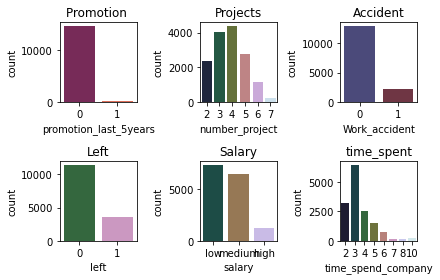

In [39]:
fig = plt.figure(figsize=(20,8))
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.tight_layout()
plt.subplot(231)
sns.countplot(data['promotion_last_5years'],palette="rocket")
plt.title("Promotion ")
plt.subplot(232)
sns.countplot(data['number_project'],palette="cubehelix")
plt.title("Projects")
plt.subplot(233)
sns.countplot(data['Work_accident'],palette="icefire")
plt.title("Accident")
plt.subplot(234)
sns.countplot(data['left'],palette="cubehelix")
plt.title("Left")
plt.subplot(235)
sns.countplot(data['salary'],palette="cubehelix")
plt.title("Salary")
plt.subplot(236)
sns.countplot(data['time_spend_company'],palette="cubehelix")
plt.title("time_spent")
fig.tight_layout()
plt.show()

# observations:
1. Very few promotions in the last 5 years
2. Maximum employees have executed 3 or 4 projects
3. Not many accidents
4. ~ 30% of the employees have left the organiztion
5. More employees belong to the low salary group

## Determine # of Employees belonging to each department

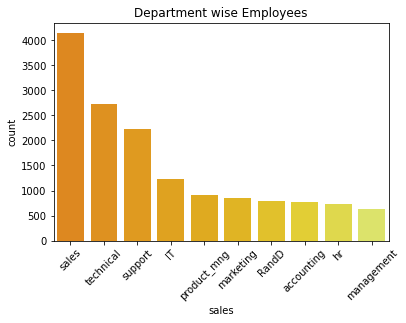

In [42]:
sns.countplot(data['sales'],palette="Wistia_r",order=data['sales'].value_counts().index)

plt.title("Department wise Employees")
plt.xticks(rotation=45)
plt.show()

## observations
1. More employees belong to Sales, technical, support and IT departments.
2. Least number of employees belong to HR, Management departments

## Categories of variables 

In [47]:
for column in data.columns:
    print(f"Categories for {column}: {data[column].nunique()} \n {data[column].unique()}")

Categories for satisfaction_level: 92 
 [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
Categories for last_evaluation: 65 
 [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
Categories for number_project: 6 
 [2 5 7 6 4 3]
Categories for average_montly_hours: 215 
 [157 262 272 223 159 153 247 259 224 

#### Apriori algorithm accepts only categorical variables, hence we need to convert each non categorical variable to categorical type.
1. sales and salary variables are objects(categorical)
2. promotion_last_5years,work_accident,time_spend_company,number_project are categorical but are in the form of integer,hence conversion is required

In [75]:
# delecte unwanted column left
data_modified=data.drop('left',axis=1)

In [76]:
for column in data_modified.columns:
    if(data_modified[column].dtypes!='object'):
        data_modified[column]=data_modified[column].astype('category')
    else:
        continue

In [77]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  category
 1   last_evaluation        14999 non-null  category
 2   number_project         14999 non-null  category
 3   average_montly_hours   14999 non-null  category
 4   time_spend_company     14999 non-null  category
 5   Work_accident          14999 non-null  category
 6   promotion_last_5years  14999 non-null  category
 7   sales                  14999 non-null  object  
 8   salary                 14999 non-null  object  
dtypes: category(7), object(2)
memory usage: 367.6+ KB


In [78]:
#Dataset Description
data_modified.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
count,14999.0,14999.00,14999,14999,14999,14999,14999,14999,14999
unique,92.0,65.00,6,215,8,2,2,10,3
top,0.1,0.55,4,135,3,0,0,sales,low
freq,358.0,358.00,4365,153,6443,12830,14680,4140,7316


There are three continuous variables satisfaction_level, last_evaluation, average_montly_hours

In [79]:
#Create bins for continuous variables
column_convert=['satisfaction_level','last_evaluation','average_montly_hours']
for col in column_convert:
    data_modified[col]=pd.qcut(data_modified[col],q=3,labels=['Low','Average','High'])

In [80]:
data_modified.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,Low,Low,2,Low,3,0,0,sales,low
1,High,High,5,High,6,0,0,sales,medium
2,Low,High,7,High,4,0,0,sales,medium
3,Average,High,5,Average,5,0,0,sales,low
4,Low,Low,2,Low,3,0,0,sales,low


In [81]:
data_new=pd.get_dummies(data_modified)

In [82]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   satisfaction_level_Low        14999 non-null  uint8
 1   satisfaction_level_Average    14999 non-null  uint8
 2   satisfaction_level_High       14999 non-null  uint8
 3   last_evaluation_Low           14999 non-null  uint8
 4   last_evaluation_Average       14999 non-null  uint8
 5   last_evaluation_High          14999 non-null  uint8
 6   number_project_2              14999 non-null  uint8
 7   number_project_3              14999 non-null  uint8
 8   number_project_4              14999 non-null  uint8
 9   number_project_5              14999 non-null  uint8
 10  number_project_6              14999 non-null  uint8
 11  number_project_7              14999 non-null  uint8
 12  average_montly_hours_Low      14999 non-null  uint8
 13  average_montly_hours_Average  1

In [70]:
!pip install mlxtend

In [85]:
#Syntax of apriori() 
#apriori( data, use_colnames =, min_support =, max_len =)

#data represents the data on which the algorithm is executed. 
# use_colnames has a Boolean value representing whether colnames are considered or not.
# min_support is the minimum support required and has value between 0 and 1.
# max_len specifies the maximum number of factors that will be considered. 

#Syntax of association_rules() 
#association_rules( freq_fact, metric =, min_threshold =) 
#freq_fact are the frequent factors that are determined.
# metric specifies the measurement that needs to be considered. 
# min_threshold specifies the threshold value that should be considered.

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#frequent factors
frequent_factors=apriori(data_new,use_colnames=True,min_support=0.1,max_len=4)
# minimum support as 0.1 and maximum length of factors as 4. This means that until and unless the frequency of factors is not 10%, these factors will not be considered for further analysis.


#Filtering the factors based on the conditions
rules=association_rules(frequent_factors,metric='lift',min_threshold=1)
#It should be noted that it is difficult to do further analysis of the data if 5000 factors are still left after filtering on the basis of support. In such a situation, the concept of lift is used because
#association rules for all of them is a difficult and practically impossible task for a large dataset. This is done by using the association_rules() function considering metric as lift and minimum threshold as 1.



In [86]:
print(rules.head(10).sort_values(by='confidence',ascending=False))

                  antecedents                 consequents  antecedent support  \
9    (satisfaction_level_Low)           (Work_accident_0)            0.346356   
2          (number_project_2)    (satisfaction_level_Low)            0.159211   
1    (satisfaction_level_Low)       (last_evaluation_Low)            0.346356   
0       (last_evaluation_Low)    (satisfaction_level_Low)            0.346490   
4  (average_montly_hours_Low)    (satisfaction_level_Low)            0.334089   
5    (satisfaction_level_Low)  (average_montly_hours_Low)            0.346356   
7    (satisfaction_level_Low)      (time_spend_company_3)            0.346356   
6      (time_spend_company_3)    (satisfaction_level_Low)            0.429562   
8           (Work_accident_0)    (satisfaction_level_Low)            0.855390   
3    (satisfaction_level_Low)          (number_project_2)            0.346356   

   consequent support   support  confidence      lift  leverage  conviction  
9            0.855390  0.30788

## Objective
### To identify the association of low satisfaction level with different factors

In [88]:
#Define string ('Satisfaction_level_low') that is searched in consequents
target='(\'satisfaction_level_Low\')'

#Search required string in consequences and sorting values on confidence
results_low=rules[rules['consequents'].astype(str).str.contains(target,na=False)].sort_values(by='confidence',ascending=False)
results_low.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
723,"(last_evaluation_Low, time_spend_company_3, nu...",(satisfaction_level_Low),0.110074,0.346356,0.105940,0.962447,2.778776,0.067816,17.405896
848,"(number_project_2, average_montly_hours_Low, t...",(satisfaction_level_Low),0.110341,0.346356,0.105674,0.957704,2.765082,0.067457,15.454002
709,"(last_evaluation_Low, average_montly_hours_Low...",(satisfaction_level_Low),0.112141,0.346356,0.107007,0.954221,2.755027,0.068166,14.278292
862,"(average_montly_hours_Low, Work_accident_0, nu...",(satisfaction_level_Low),0.115608,0.346356,0.104940,0.907728,2.620791,0.064899,7.083862
737,"(last_evaluation_Low, Work_accident_0, number_...",(satisfaction_level_Low),0.116541,0.346356,0.105540,0.905606,2.614666,0.065176,6.924660
876,"(average_montly_hours_Low, promotion_last_5yea...",(satisfaction_level_Low),0.122475,0.346356,0.110074,0.898748,2.594864,0.067654,6.455609
168,"(average_montly_hours_Low, number_project_2)",(satisfaction_level_Low),0.124008,0.346356,0.111407,0.898387,2.593823,0.068456,6.432683
890,"(number_project_2, Work_accident_0, time_spend...",(satisfaction_level_Low),0.115141,0.346356,0.103340,0.897510,2.591291,0.063460,6.377641
751,"(last_evaluation_Low, promotion_last_5years_0,...",(satisfaction_level_Low),0.123608,0.346356,0.110741,0.895901,2.586644,0.067928,6.279042
139,"(last_evaluation_Low, number_project_2)",(satisfaction_level_Low),0.125675,0.346356,0.112274,0.893369,2.579333,0.068746,6.129941


## Summary:

lift>1  indicates an association between the antecedents and consequents.

This further means that all the antecedents displayed in different records are associated with the consequent (satisfaction_level_Low).

Also, the confidence is found to be > 0.5, which means that the occurrence of the records is greater than 50%. 
It is clear from the first record that the combination of number_project_2 and average_montly_hours_Low is associated with satisfaction_level_Low.

It is clear from all the results that some of the important factors of low satisfaction level are that the number of projects is equal to 2, time spend in a company is 3 years, and the last evaluation is low.

Thus, for increasing the satisfaction level, the organization should change the number of projects and special strategies should be designed for employees who have completed 3 years. It is also suggested that steps should be considered for employees whose last evaluation score is also low.



# Objective:
## To identify the association of average satisfaction level with different factors

In [90]:
#define the string to search in consequent
target='(\'satisfaction_level_Average\')'

#Searching required string in consequents and sorting values on confidence
results_average=rules[rules['consequents'].astype(str).str.contains(target,na=False)].sort_values(by='confidence',ascending=False)

#top 10 results
results_average.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(number_project_3),(satisfaction_level_Average),0.270351,0.324688,0.117274,0.433785,1.336006,0.029495,1.192678
258,"(number_project_3, promotion_last_5years_0)",(satisfaction_level_Average),0.264018,0.324688,0.114408,0.433333,1.334613,0.028684,1.191727
260,(number_project_3),"(satisfaction_level_Average, promotion_last_5y...",0.270351,0.317088,0.114408,0.423181,1.334587,0.028683,1.183929
263,"(promotion_last_5years_0, number_project_4)",(satisfaction_level_Average),0.283219,0.324688,0.113208,0.399718,1.231081,0.021250,1.124990
19,(number_project_4),(satisfaction_level_Average),0.291019,0.324688,0.116008,0.398625,1.227717,0.021517,1.122947
271,"(average_montly_hours_Average, promotion_last_...",(satisfaction_level_Average),0.329422,0.324688,0.130342,0.395669,1.218611,0.023383,1.117453
21,(average_montly_hours_Average),(satisfaction_level_Average),0.337222,0.324688,0.133209,0.395018,1.216606,0.023717,1.116250
1018,"(average_montly_hours_Average, promotion_last_...",(satisfaction_level_Average),0.274818,0.324688,0.107474,0.391072,1.204454,0.018244,1.109018
267,"(Work_accident_0, average_montly_hours_Average)",(satisfaction_level_Average),0.281019,0.324688,0.109407,0.389324,1.199069,0.018164,1.105843
265,(number_project_4),"(satisfaction_level_Average, promotion_last_5y...",0.291019,0.317088,0.113208,0.389003,1.226800,0.020929,1.117702


## Summary
The lift of the first 10 records is found to be > 1. This means there is an association between the antecedents and consequents. This further means that all the antecedents displayed in different records are associated with the consequent (satisfaction_level_Average). 
Also, the confidence is found to be > 0.38, which means that the occurrence of the records is greater than 38%.

It is clear from the first record that number_project_3 is highly associated with satisfaction_level_Average. 

It is clear from the information of antecedents from all the results that some of the important factors of average satisfaction level are that the number of projects is equal to 3, no promotion in last 5 years is 0, and monthly hours belong to the average category. 

#### Thus, for increasing the satisfaction level, the organization should change the number of projects and special strategies should be designed for employees who have not been given promotion. It is also suggested that steps should be considered for employees whose monthly hours and last evaluation score are average.



## Objective:
#### 3. To identify the association of high satisfction level with different factors

In [93]:
# define the search string
target='(\'satisfaction_level_High\')'
results_high=rules[rules['consequents'].astype(str).str.contains(target,na=False)].sort_values(by='confidence',ascending=False)
results_high.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
311,"(Work_accident_0, number_project_4)",(satisfaction_level_High),0.245483,0.328955,0.104674,0.426399,1.296221,0.023921,1.169880
1053,"(Work_accident_0, promotion_last_5years_0, num...",(satisfaction_level_High),0.239349,0.328955,0.101407,0.423677,1.287947,0.022672,1.164355
31,(number_project_4),(satisfaction_level_High),0.291019,0.328955,0.123275,0.423597,1.287703,0.027543,1.164193
315,"(promotion_last_5years_0, number_project_4)",(satisfaction_level_High),0.283219,0.328955,0.119408,0.421610,1.281664,0.026242,1.160195
1056,"(Work_accident_0, number_project_4)","(satisfaction_level_High, promotion_last_5year...",0.245483,0.320888,0.101407,0.413091,1.287336,0.022634,1.157099
317,(number_project_4),"(satisfaction_level_High, promotion_last_5year...",0.291019,0.320888,0.119408,0.410309,1.278668,0.026023,1.151641
294,"(last_evaluation_High, Work_accident_0)",(satisfaction_level_High),0.289353,0.328955,0.116808,0.403687,1.227178,0.021624,1.125322
1041,"(last_evaluation_High, promotion_last_5years_0...",(satisfaction_level_High),0.285619,0.328955,0.114874,0.402194,1.222641,0.020918,1.122513
27,(last_evaluation_High),(satisfaction_level_High),0.333156,0.328955,0.132676,0.398239,1.210617,0.023082,1.115135
300,"(last_evaluation_High, promotion_last_5years_0)",(satisfaction_level_High),0.327288,0.328955,0.130075,0.397433,1.208168,0.022412,1.113644


## Summary
The lift of the first 10 records is found to be > 1. This means there is an association between the antecedents and consequents. This further means that all the antecedents displayed in different records are associated with the consequent (satisfaction_level_High).

Also, the confidence is found to be > 0.37, which means that the occurrence of the records is greater than 37%. 

It is clear from the first record that the combination of number_project_4 and Work_accident_0 is highly associated with satisfaction_level_High.

It is clear from the information of antecedents from all the results that some of the important factors of high satisfaction level are that the number of projects is equal to 4, last evaluation is high, and number of work accidents is 0. 

Thus, for increasing the satisfaction of all the employees, the organization should increase the number of projects to 4 and formulate strategies so that the last evaluation score is high and make the number of work accidents as 0.

